## Project 2 - Supervised Learning - Gradiant Descent and Classification
### Due: 4/2/2021 Frinday 11:59 PM

### Task
This project is broadly breakinto two parts: 
1. Gradient Descent Implementation - the task is to implement the gradien descent function to find all possible local mamina and gloabl minimum coordinates. 
2. Wine Quality Classifiaction Implementation - the task is to implement three classifiers, KNN, LDA, and Logistic Regresion, to classify the quality of red wine using a given data `winequality-red.csv`.

### Descriptions & Rules
1. All work must be your own. Any evidence of copying, collaborating, and cheating will result 0. 
2. This project does not require a report. However, all work and results must be discussed - simply answering or stating results is not acceptable. 
3. **The project will not allow any extenstions** - except a case of health and other emergencies. You must submit the project as incompletion if you do not finish on time. 
4. You must submit the **jupyter notebook** file and the **exported HTML** file. 
5. All codes must be excutable - if the code does not work, you will get 0 for that particular code. 

### Gradient Descent Implementation. 

We are going to implement a standard gradient decent optimization function `my_GradDes(x,y,z,theta,learning_rate,iteration)` to find all possible local maxima and global maximum coordinates. 

Data Set: `P2_1.csv` has four features. We have $x=(-4.0,4.0)$ and $y=(-4.0,4.0)$, the true $z$ value is a function of $x$ and $y$, $z=f(x,y)$, and $z_pred$ which is a predicted value of $z$. Below a 3-D plot is povided. 

Requirement:
1. The cost function: $J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h(\theta)^i-y^i))^2$
2. Gradient: $\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m}(h(\theta)^i-y^i)).X_j^i$

where $m=$number of observation. 


Task:
1. Test with the learning rate $\eta=[0.01, 0.05, 0.1, 1]$. 


Required Result: For each $\eta$, report
1. Iteration #
2. Did it overshoot?
3. Total number of local minima
4. The coordinates ($x,y$) for all local minima and global mimimum

Points: 
- Code: 25 points
- Test: 5 points
- Answers: 20 points

<IPython.core.display.Javascript object>


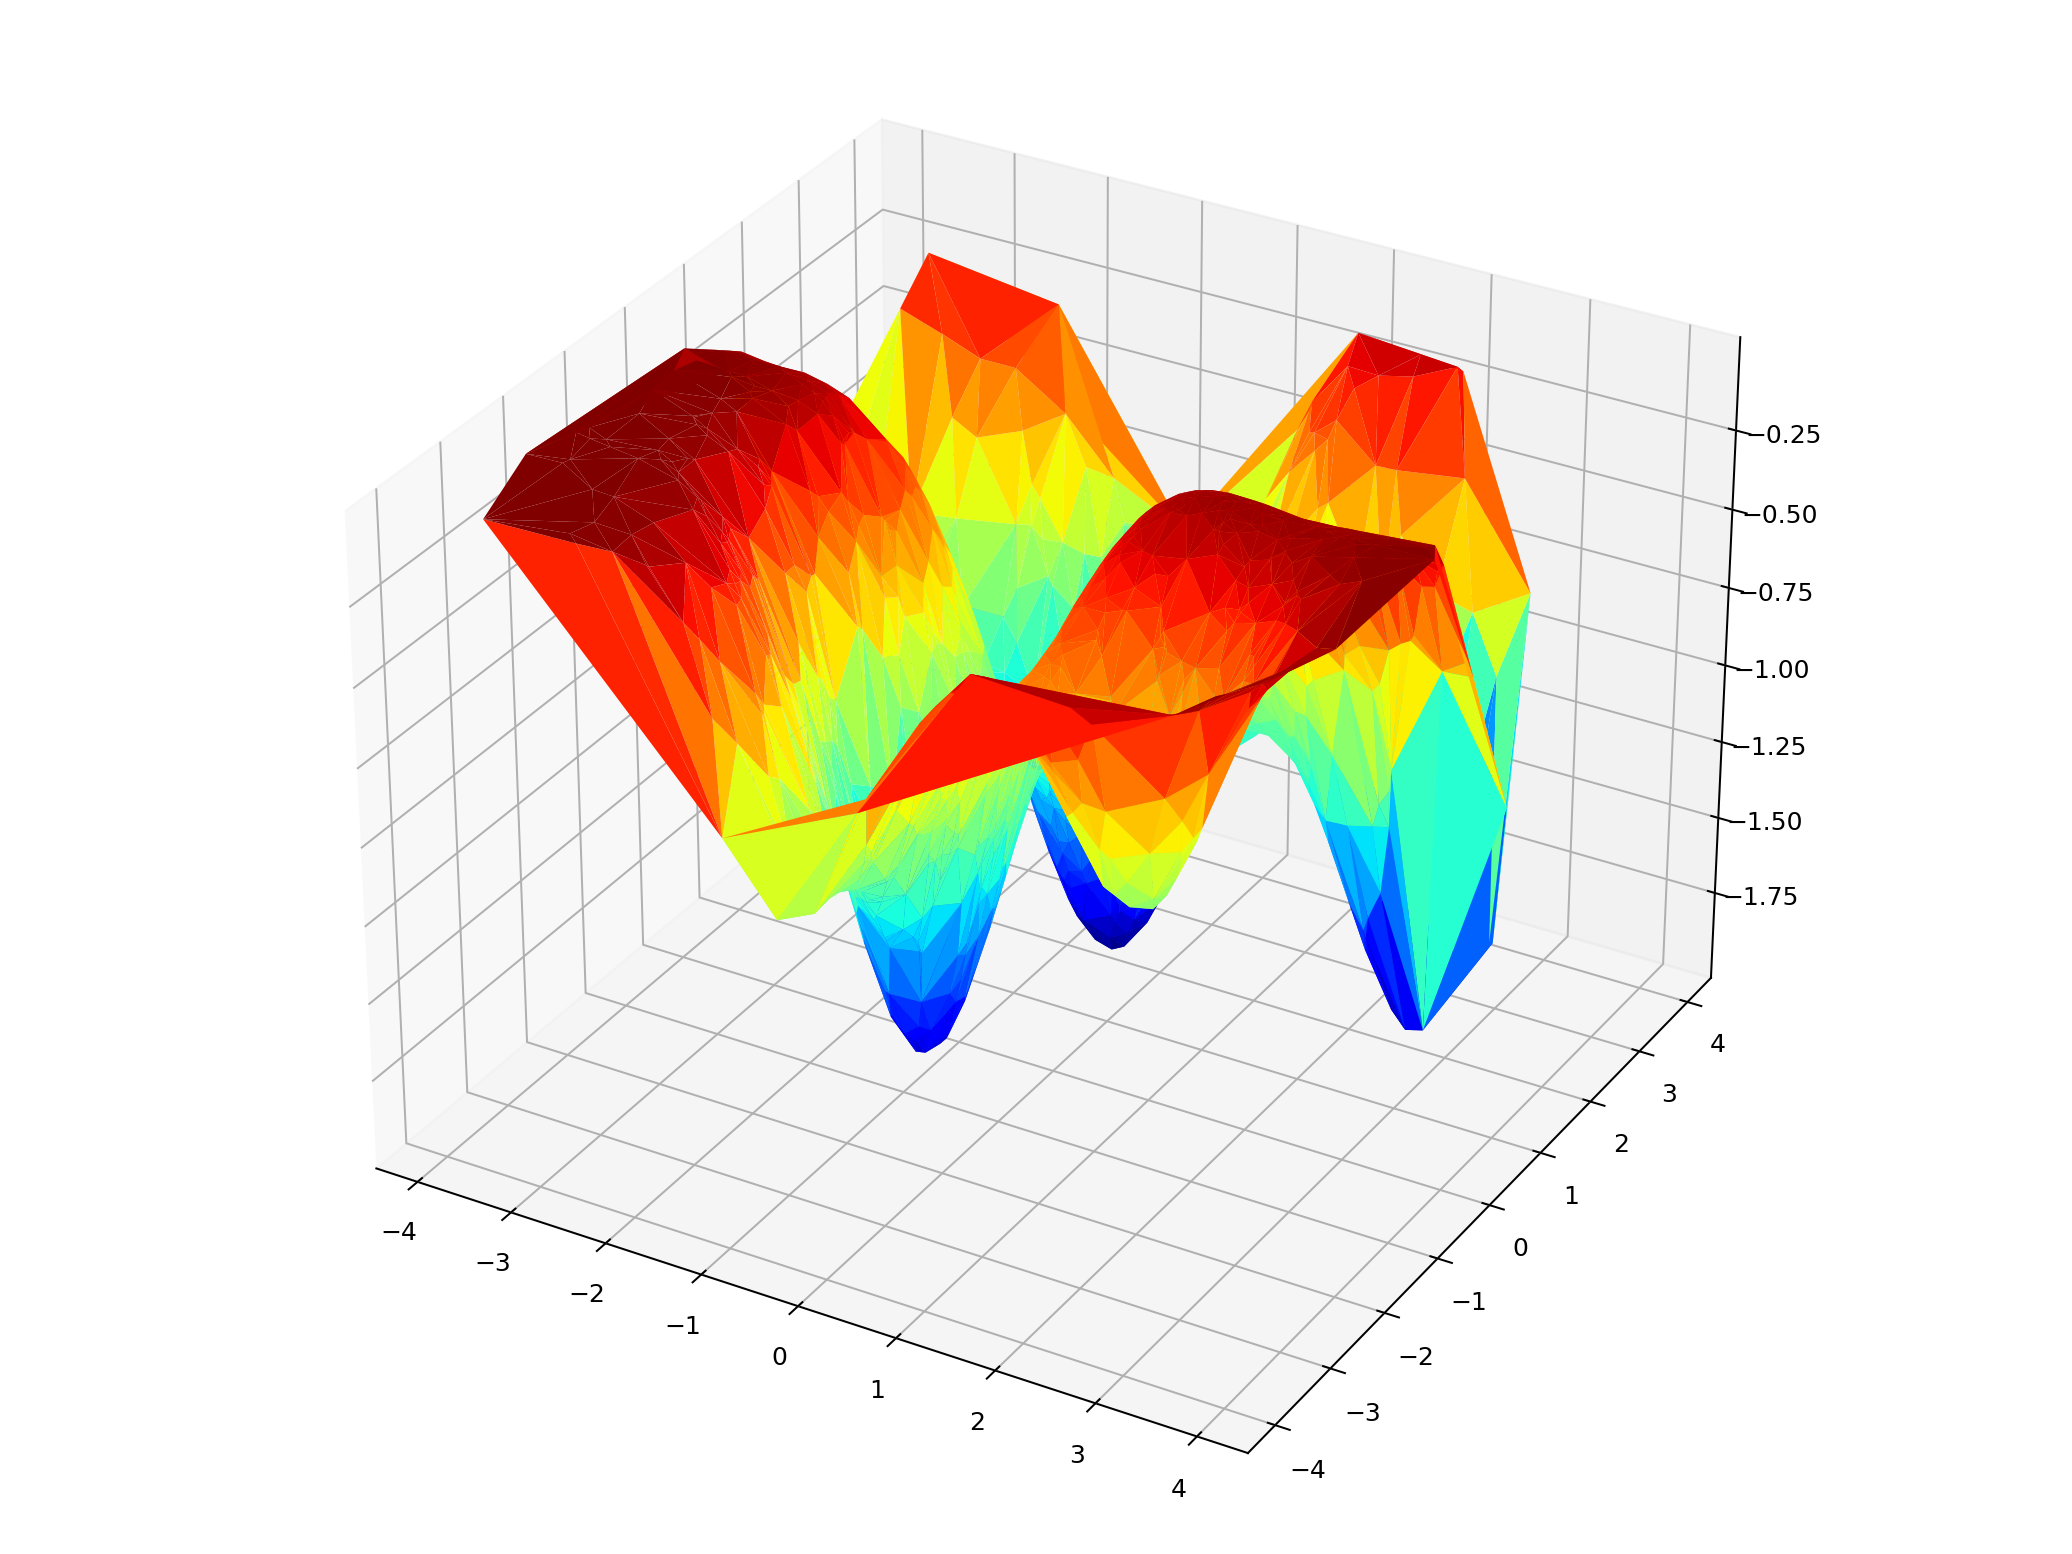

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
df = pd.read_csv('P2_1.csv')

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(df.x, df.y, df.z, cmap=cm.jet, linewidth=0.2)
plt.show()

In [ ]:
### Code Starts Here
def my_Gradient(x,y,z,theta,learning_rate,iteration):
    

Answer the result here:

### Classification - Wine Quality 

In the given data, `winequality-red.csv`,there are 12 features and the target is “quality”. You are going to implement three classifiers to classify the wine quality. 

A. Exploratory Data Analysis: (10 pts)

- a. Find missing value features and impute the value using mean, median, and 0. 
- b. Make histograms and determine which method in A-a is the most appropriate. 
- c. The wine quality is rated from 3 to 8. Categorize the quality to be a binary categorical data as good and bad.

B. Implement KNN function, my_KNN, to classify the good and bad wine quality. (10 pts)

C. Implement LDA, my_LDA, to classify the good and bad wine quality. (15 pts)

D. Implement Logistic Regression, my_LogisticRegression, to classify the wine quality. (20 pts)

E. Use the implemented classifiers and report the accuracy of classifications. Present the result in dataframe. (5 pts)